In [93]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from statsmodels.robust.scale import huber
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import re
plt.style.use('seaborn')
%matplotlib inline

pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)



df_indicadores = pd.read_parquet(f'../data/processed/df_indicadores.parquet')

df_final_pob = pd.read_parquet('../data/processed/df_final_pob.parquet')


In [94]:
pd.set_option('display.max_rows', 0)

df_final_pob



,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,Abastecimiento domiciliario de agua potable,"Abastos, mercados, lonjas",Acceso a los núcleos de población,Actividades funerarias,Alcantarillado,Alumbrado público,Biblioteca pública,Cementerio,Comercio ambulante,Conservación y rehabilitación de la edificación,"Conservación, mantenimiento y vigilancia de los edificios de titularidad local destinados a centros públicos de educación infantil, de educación primaria o de educación especial",Cooperar con las Administraciones educativas correspondientes en la obtención de los solares necesarios para la construcción de nuevos centros docentes,Equipamientos culturales,Evacuación y tratamiento de aguas residuales,Evaluación e información de situaciones de necesidad social y la atención inmediata a personas en situación o riesgo de exclusión social,Ferias,Información y promoción de la actividad turística de interés y ámbito local,Infraestructura viaria y otros equipamientos de titularidad de la entidad local,Instalaciones de ocupación del tiempo libre,Instalaciones deportivas,Instalaciones deportivas de uso público,Limpieza viaria,Medio ambiente urbano,Medio ambiente urbano: Gestión de los residuos sólidos urbanos,Medio ambiente urbano: Parques y jardines públicos,"Medio ambiente urbano: Protección contra la contaminación acústica, lumínica y atmosférica en las zonas urbanas",Parque público,Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,Pavimentación de las vías públicas,Policía local,Prevención y extinción de incendios,Promoción de la cultura,Promoción del deporte,Promoción en su término municipal de la participación de los ciudadanos en el uso eficiente y sostenible de las tecnologías de la información y las comunicaciones,Promoción y gestión de la vivienda de protección pública con criterios de sostenibilidad financiera,...,PC_Alumbrado público,PC_Biblioteca pública,PC_Cementerio,PC_Comercio ambulante,PC_Conservación y rehabilitación de la edificación,"PC_Conservación, mantenimiento y vigilancia de los edificios de titularidad local destinados a centros públicos de educación infantil, de educación primaria o de educación especial",PC_Cooperar con las Administraciones educativas correspondientes en la obtención de los solares necesarios para la construcción de nuevos centros docentes,PC_Equipamientos culturales,PC_Evacuación y tratamiento de aguas residuales,PC_Evaluación e información de situaciones de necesidad social y la atención inmediata a personas en situación o riesgo de exclusión social,PC_Ferias,PC_Información y promoción de la actividad turística de interés y ámbito local,PC_Infraestructura viaria y otros equipamientos de titularidad de la entidad local,PC_Instalaciones de ocupación del tiempo libre,PC_Instalaciones deportivas,PC_Instalaciones deportivas de uso público,PC_Limpieza viaria,PC_Medio ambiente urbano,PC_Medio ambiente urbano: Gestión de los residuos sólidos urbanos,PC_Medio ambiente urbano: Parques y jardines públicos,"PC_Medio ambiente urbano: Protección contra la contaminación acústica, lumínica y atmosférica en las zonas urbanas",PC_Parque público,PC_Participar en la vigilancia del cumplimiento de la escolaridad obligatoria,PC_Pavimentación de las vías públicas,PC_Policía local,PC_Prevención y extinción de incendios,PC_Promoción de la cultura,PC_Promoción del deporte,PC_Promoción en su término municipal de la participación de los ciudadanos en el uso eficiente y sostenible de las tecnologías de la información y las comunicaciones,PC_Promoción y gestión de la vivienda de protección pública con criterios de sostenibilidad financiera,PC_Protección civil,PC_Protección de la salubridad pública,PC_Protección y gestión del Patrimonio histórico,PC_Recogida de residuos,PC_Transporte colectivo urbano de viajeros,PC_Tratamiento de residuos,"PC_Tráfico, estacionamiento de vehículos y movilidad","PC_Urbanismo: planeamiento, gestión, ejecución y disciplina urbanística"

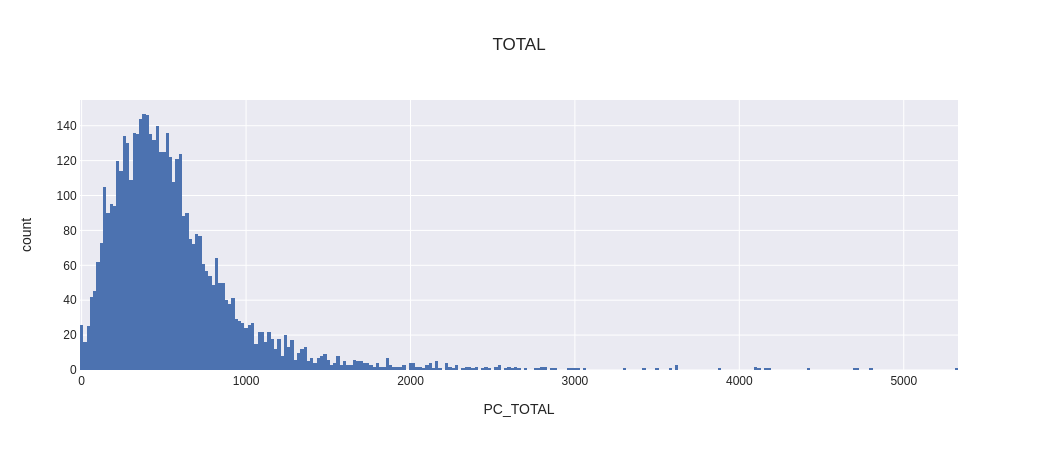

In [149]:
OB=df_final_pob.columns[50]

fig=px.histogram(df_final_pob, x=f'PC_{OB}',nbins=400,template='seaborn',title=f'{OB}',barmode='group')
fig.show()

In [151]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 0)



yea=df_final_pob[['CCAA', 'Provincia','Nombre Ente Principal','Código Ente Principal','Población 2018',
              'TOTAL', 'PC_TOTAL',OB,f'PC_{OB}']].sort_values(by=f'PC_{OB}', ascending=False).head(10).T
yea

,3668,1110,1066,4855,767,3707,1711,1050,849,4104
CCAA,Cataluña,Aragón,Aragón,Comunitat Valenciana,Aragón,Cataluña,Castilla y León,Aragón,Aragón,Extremadura
Provincia,Tarragona,Zaragoza,Zaragoza,Castellón / Castelló,Huesca,Tarragona,Burgos,Zaragoza,Teruel,Cáceres
Nombre Ente Principal,Ascó,Tarazona,Nombrevilla,Pobla de Benifassà (la),Montanuy,Forès,Jaramillo Quemado,Mianos,Calamocha,Romangordo
Código Ente Principal,09-43-019-AA-000,02-50-251-AA-000,02-50-188-AA-000,17-12-093-AA-000,02-22-157-AA-000,09-43-061-AA-000,07-09-184-AA-000,02-50-168-AA-000,02-44-050-AA-000,10-10-160-AA-000
Población 2018,1674,10509,29,197,215,42,8,32,4319,259
TOTAL,8.91234e+06,5.04376e+07,136802,924502,948738,175888,33214.1,131565,1.77308e+07,1.05933e+06
TOTAL,8.91234e+06,5.04376e+07,136802,924502,948738,175888,33214.1,131565,1.77308e+07,1.05933e+06
PC_TOTAL,5323.98,4799.46,4717.31,4692.9,4412.74,4187.8,4151.76,4111.41,4105.3,4090.07


In [97]:


# pd.set_option('display.max_columns', None)

# df_final_pob.loc[(df_final_pob['Población 2018']>11000)&(df_final_pob['Población 2018']<11200)]

In [98]:
df_indicadores.loc[(df_indicadores['Código Ente Principal']==yea.iloc[3,0])&(df_indicadores['Descripción']==OB)]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
14346,Toledo,08-45-203-AA-000,Ayuntamiento,Yuncler,Actividades funerarias,Nº efectivos en plantilla asignados al servicio,0.0
14347,Toledo,08-45-203-AA-000,Ayuntamiento,Yuncler,Actividades funerarias,Nº vehículos adscritos al servicio,0.0


# MELT

In [99]:
pd.set_option('display.max_rows', 0)
vars_melt=df_final_pob.columns[0:5].to_list()+df_final_pob.columns[95:96].to_list()


df_final_pob_melt=pd.melt(df_final_pob, id_vars=vars_melt,value_vars=df_final_pob.columns[5:48],
        var_name='Descripción',value_name='coste_efectivo')


df_final_pob_melt.to_parquet('../data/processed/df_final_pob_melt.parquet')

print(df_final_pob_melt['coste_efectivo'].sum())

df_final_pob_melt



28641291941.31


,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo
0,Andalucía,Almería,Ayuntamiento,Abla,01-04-001-AA-000,1000-2000,Abastecimiento domiciliario de agua potable,282928.39
1,Andalucía,Almería,Ayuntamiento,Abrucena,01-04-002-AA-000,1000-2000,Abastecimiento domiciliario de agua potable,77227.64
2,Andalucía,Almería,Ayuntamiento,Adra,01-04-003-AA-000,20000-50000,Abastecimiento domiciliario de agua potable,1255574.16
3,Andalucía,Almería,Ayuntamiento,Albánchez,01-04-004-AA-000,0-1000,Abastecimiento domiciliario de agua potable,60828.11
4,Andalucía,Almería,Ayuntamiento,Alboloduy,01-04-005-AA-000,0-1000,Abastecimiento domiciliario de agua potable,157266.48
5,Andalucía,Almería,Ayuntamiento,Albox,01-04-006-AA-000,10000-20000,Abastecimiento domiciliario de agua potable,0.00
6,Andalucía,Almería,Ayuntamiento,Alcolea,01-04-007-AA-000,0-1000,Abastecimiento domiciliario de agua potable,61945.05
7,Andalucía,Almería,Ayuntamiento,Alcóntar,01-04-008-AA-000,0-1000,Abastecimiento domiciliario de agua potable,50007.27
8,Andalucía,Almería,Ayuntamiento,Alcudia de Monteagud,01-04-009-AA-000,0-1000,Abastecimiento domiciliario de agua potable,36579.39
...,...,...,...,...,...,...,...,...


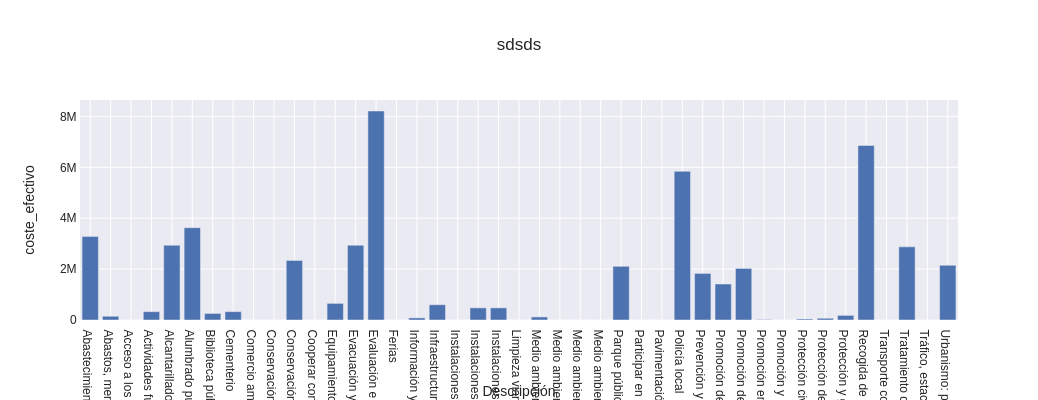

In [100]:
graph=df_final_pob_melt.loc[(df_final_pob_melt['Nombre Ente Principal']=='Lugo')]


fig=px.bar(graph,x='Descripción', y='coste_efectivo',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

/home/carpiero/miniconda3/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



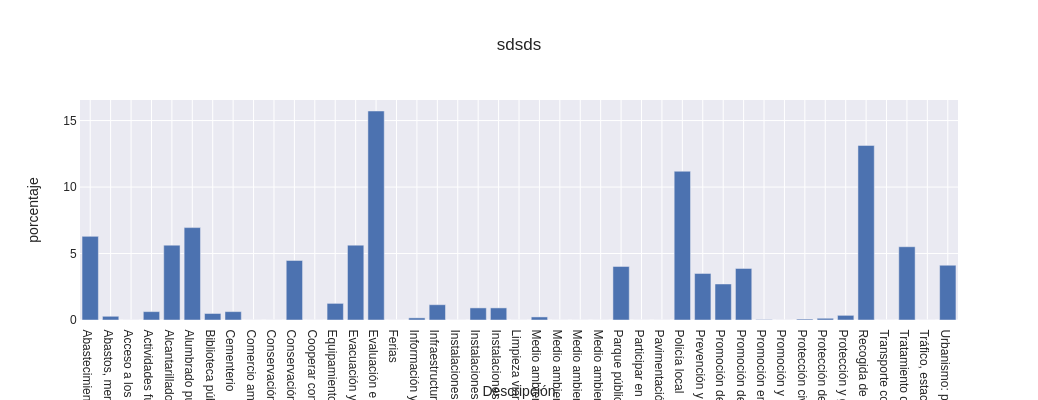

In [101]:
def porcentaje(df):
    df['porcentaje']=df.apply(lambda new: round(new['coste_efectivo']/df['coste_efectivo'].sum()*100,2), axis=1)
    return df

graph_porc=porcentaje(graph)


fig=px.bar(graph_porc,x='Descripción', y='porcentaje',template='seaborn',title='sdsds',barmode='stack', orientation='v')
fig.update_layout(height=400, width=1200)
fig.show()

In [102]:
df_indicadores.loc[(df_indicadores['Nombre Ente Principal']=='Lugo')&(df_indicadores['Descripción']=='Policía local')]

,Provincia,Código Ente Principal,Tipo Ente Principal,Nombre Ente Principal,Descripción,Unidades físicas de referencia,Nº unidades
5472,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,117.0
5473,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,25.0
5514,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº efectivos asignados al servicio,0.0
5515,Lugo,11-27-028-AA-000,Ayuntamiento,Lugo,Policía local,Nº vehículos adscritos al servicio,0.0


# MEAN

In [103]:
df_final_pob.describe().T

,count,mean,std,min,25%,50%,75%,max
Abastecimiento domiciliario de agua potable,4869.0,354777.251010,2.108914e+06,0.0,1263.460000,17924.200000,87548.220000,5.213138e+07
"Abastos, mercados, lonjas",4869.0,33926.290115,6.364999e+05,0.0,0.000000,0.000000,0.000000,2.990401e+07
Acceso a los núcleos de población,4869.0,37771.049793,2.062460e+05,0.0,0.000000,1.000000,8794.100000,7.428429e+06
Actividades funerarias,4869.0,26235.939191,4.698905e+05,0.0,0.000000,1.000000,1603.330000,2.909213e+07
Alcantarillado,4869.0,101223.892672,7.949925e+05,0.0,0.000000,1641.240000,14000.000000,2.987615e+07
Alumbrado público,4869.0,236204.862035,1.547620e+06,0.0,11813.620000,38702.770000,139051.480000,8.605973e+07
Biblioteca pública,4869.0,62466.948636,4.687014e+05,0.0,0.000000,0.000000,24137.470000,2.736592e+07
Cementerio,4869.0,37982.991489,4.188734e+05,0.0,0.010000,1201.350000,10323.040000,1.840672e+07
Comercio ambulante,4869.0,2916.237149,3.412904e+04,0.0,0.000000,0.000000,0.000000,1.721658e+06
...,...,...,...,...,...,...,...,...


In [104]:
columns_total=df_final_pob.columns[5:48].to_list()+df_final_pob.columns[50:51].to_list()

print(len(columns_total))

columns_pc=df_final_pob.columns[51:].to_list()
print(len(columns_pc))


44
45


In [105]:
rs = RobustScaler()
# X = pd.DataFrame(rs.fit_transform(X), columns= X.columns)
rs.fit(df_final_pob[columns_pc])

rs.center_


ValueError: could not convert string to float: '1000-2000'

In [ ]:
df_final_pob.describe().T['mean'].to_list()

In [ ]:
df=df_final_pob_melt

well_statuses=['Aragón','Andalucía','La Rioja']
well_types=['Zaragoza','Córdoba']
municipio_types=['Torrellas','Palma del Río']
partida_de_coste_types=['Actividades funerarias','Biblioteca pública']

df[df["CCAA"].isin(well_statuses)
        & df['Provincia'].isin(well_types)
        & df['Nombre Ente Principal'].isin(municipio_types)
        & df['Descripción'].isin(partida_de_coste_types)]

In [ ]:

dff=df[df["CCAA"].isin(well_statuses)
        & df['Provincia'].isin(well_types)
        & df['Nombre Ente Principal'].isin(municipio_types)
        & df['Descripción'].isin(partida_de_coste_types)]


dff["coste_efectivo"].values

In [106]:
CCAA=sorted(df_final_pob['CCAA'].unique().to_list())
CCAA.insert(0, 'TODAS')


CCAA_dict = dict(zip(CCAA, CCAA))

CCAA_dict


{'TODAS': 'TODAS',
 'Andalucía': 'Andalucía',
 'Aragón': 'Aragón',
 'Canarias': 'Canarias',
 'Cantabria': 'Cantabria',
 'Castilla y León': 'Castilla y León',
 'Castilla-La Mancha': 'Castilla-La Mancha',
 'Cataluña': 'Cataluña',
 'Comunidad de Madrid': 'Comunidad de Madrid',
 'Comunitat Valenciana': 'Comunitat Valenciana',
 'Extremadura': 'Extremadura',
 'Galicia': 'Galicia',
 'Illes Balears': 'Illes Balears',
 'La Rioja': 'La Rioja',
 'Principado de Asturias': 'Principado de Asturias',
 'Región de Murcia': 'Región de Murcia'}

In [107]:
list(CCAA_dict.keys())[0]

'TODAS'

In [108]:
prov=sorted(df_final_pob['Provincia'].unique().to_list())
prov.insert(0, 'TODAS')
PROV = dict(zip(prov, prov))

CCAA_options = [ {"label": CCAA_dict[x], "value": x}for x in CCAA_dict]

PROV_type_options = [ {"label": PROV[x], "value":x}for x in PROV ]

In [109]:
pd.set_option('display.max_rows', 0)

CCAA_types = 'Cantabria'

if CCAA_types =='TODAS':
    value=list(PROV.keys())[0]
    options=PROV_type_options
else:
    
    prov_def=sorted(df_final_pob_melt.loc[df_final_pob_melt['CCAA']==CCAA_types,'Provincia'].unique().to_list())
    prov_def.insert(0, 'TODAS')
    PROV_def = dict(zip(prov_def, prov_def))
    PROV_def_type_options = [ {"label": PROV_def[x], "value":x}for x in PROV_def ]
    value=list(PROV_def.keys())[0]



PROV_def_type_options



[{'label': 'TODAS', 'value': 'TODAS'},
 {'label': 'Cantabria', 'value': 'Cantabria'}]

In [110]:
print(value)
options

TODAS


[{'label': 'TODAS', 'value': 'TODAS'},
 {'label': 'Albacete', 'value': 'Albacete'},
 {'label': 'Alicante / Alacant', 'value': 'Alicante / Alacant'},
 {'label': 'Almería', 'value': 'Almería'},
 {'label': 'Asturias', 'value': 'Asturias'},
 {'label': 'Avila', 'value': 'Avila'},
 {'label': 'Badajoz', 'value': 'Badajoz'},
 {'label': 'Barcelona', 'value': 'Barcelona'},
 {'label': 'Burgos', 'value': 'Burgos'},
 {'label': 'Cantabria', 'value': 'Cantabria'},
 {'label': 'Castellón / Castelló', 'value': 'Castellón / Castelló'},
 {'label': 'Ciudad Real', 'value': 'Ciudad Real'},
 {'label': 'Coruña, A', 'value': 'Coruña, A'},
 {'label': 'Cuenca', 'value': 'Cuenca'},
 {'label': 'Cáceres', 'value': 'Cáceres'},
 {'label': 'Cádiz', 'value': 'Cádiz'},
 {'label': 'Córdoba', 'value': 'Córdoba'},
 {'label': 'Girona', 'value': 'Girona'},
 {'label': 'Granada', 'value': 'Granada'},
 {'label': 'Guadalajara', 'value': 'Guadalajara'},
 {'label': 'Huelva', 'value': 'Huelva'},
 {'label': 'Huesca', 'value': 'Huesca

In [111]:
df_final_pob_melt.loc[(df_final_pob_melt['CCAA']=='Canarias') & (df_final_pob_melt['coste_efectivo']>100),'Descripción'].unique().shape

(43,)

In [112]:
df_final_pob_melt['coste_efectivo'].sum()

28641291941.31

In [113]:
df_final_pob['PC_TOTAL'].sum()

2793076.429171892

In [114]:
df_final_pob['Población 2018'].sum()

39376812.0

In [115]:
df_final_pob_melt['coste_efectivo'].sum()/df_final_pob['Población 2018'].sum()

727.3644179551661

In [116]:
df_final_pob.loc[df_final_pob['CCAA'] == CCAA_types,'Población 2018'].sum()

567465.0

In [117]:
Población_text='727 hab.'



pob=int(''.join(re.findall(r'\d' , Población_text)))

pob

727

In [124]:
municipio_types= 'Madrid'

juan=df_final_pob_melt.loc[df_final_pob_melt['Nombre Ente Principal'] == municipio_types , 'cohorte_pob'].unique().to_list()[0]

In [125]:
df_final_pob_melt.loc[df_final_pob_melt['cohorte_pob'] == juan ]

,CCAA,Provincia,Tipo Ente Principal,Nombre Ente Principal,Código Ente Principal,cohorte_pob,Descripción,coste_efectivo
548,Andalucía,Málaga,Ayuntamiento,Málaga,01-29-067-AA-000,500000-5000000,Abastecimiento domiciliario de agua potable,4.110684e+07
645,Andalucía,Sevilla,Ayuntamiento,Sevilla,01-41-091-AA-000,500000-5000000,Abastecimiento domiciliario de agua potable,4.233650e+07
1115,Aragón,Zaragoza,Ayuntamiento,Zaragoza,02-50-297-AA-000,500000-5000000,Abastecimiento domiciliario de agua potable,2.611428e+07
2825,Cataluña,Barcelona,Ayuntamiento,Barcelona,09-08-019-AA-000,500000-5000000,Abastecimiento domiciliario de agua potable,7.893861e+06
4186,Comunidad de Madrid,Madrid,Ayuntamiento,Madrid,12-28-079-AA-000,500000-5000000,Abastecimiento domiciliario de agua potable,2.941334e+07
4854,Comunitat Valenciana,Valencia / València,Ayuntamiento,València,17-46-250-AA-000,500000-5000000,Abastecimiento domiciliario de agua potable,1.722048e+07
5417,Andalucía,Málaga,Ayuntamiento,Málaga,01-29-067-AA-000,500000-5000000,"Abastos, mercados, lonjas",1.523297e+06
5514,Andalucía,Sevilla,Ayuntamiento,Sevilla,01-41-091-AA-000,500000-5000000,"Abastos, mercados, lonjas",5.307434e+06
5984,Aragón,Zaragoza,Ayuntamiento,Zaragoza,02-50-297-AA-000,500000-5000000,"Abastos, mercados, lonjas",3.158866e+06
...,...,...,...,...,...,...,...,...
